#**Exploratory Data Analysis on Haberman Dataset**

###**About Haberman's Survival Dataset :**

* It contains information on the survival of patients who had undergone surgery for breast cancer.
* taken from a study conducted between 1958 and 1970 at the University of Chicago's Billings Hospital.
* Refer this link for the Kaggle Dataset 
https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1


####**Import all the libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#To clear warnings
import warnings 
warnings.filterwarnings("ignore") 

###**Load the dataset**

In [ ]:
# Import the dataset from a local system

from google.colab import files
uploaded = files.upload()


Saving haberman.csv to haberman.csv


In [ ]:
# Read the dataset using Pandas DataFrame

hb = pd.read_csv("haberman.csv")

In [ ]:
#Have a look at the dataset

hb

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


###**Some basic overview of the dataset**

**Q. How many datapoints and features are present ?**

In [ ]:
print(hb.shape)

(306, 4)


**Q. How many features/columns in the dataset?**

In [ ]:
print(hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


**Q.  How many datapoints per class?**
                       
**or**

**How many patients actually survived after the surgery?**

In [ ]:
hb["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

##**Summary of Haberman Dataset :**

* There are 306 datapoints and 4 features  i.e 306 patients & 4 attributes/features.

* There are 4 features i.e Age, Year, Nodes, Status
    
    Status - Class Label/ Output Label
    
    Age, Year, Nodes  - Features / Input variables

  **Attributes / Features :**
  * Age - Age of patient at time of operation
  * Year - Patient's year of operation 
  * Nodes - Number of positive axillary nodes detected
  * Status - Survival status (class attribute)
    
    1 = the patient survived 5 years or longer
    
    2 = the patient died within 5 year

* Out of 306 patients, 225 patients survived for 5 years or more & 81 patients died within 5 years.

* Since there is huge difference between the no. of datapoints for these 2 classes, hence Haberman is an Imbalanced Dataset.

 
**Objective :**  
  To predict the survival status of a patient depending 
  on 3 numerical attributes / features.

  or

  To predict whether a patient survived for more than 5 years or not, on the basis of 3  numerical attributes / features.

#**Univariate Analysis**

-- to understand which individual features are useful towards classification.

##**Histogram  &  Probability Density Function plot** 

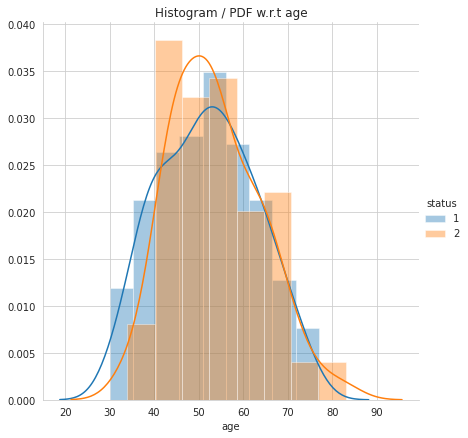

In [ ]:
# Histogram & PDF determines the density of datapoints at a certain x-value(Attribute value)

#Histogram & PDF plot of age

sns.set_style = "Whitegrid";
sns.set_palette = "Set2";
sns.FacetGrid(hb, hue="status", height=6) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram / PDF w.r.t age')
plt.show();

**Observations :**

* Age of patients lie between 30 to 85.
* Most of the patients, who survived are of age-group 50-55.
* The patients who didn't survived were mostly form the age group 40-45.

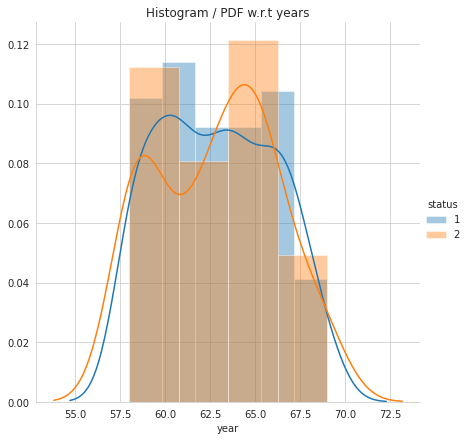

In [ ]:
#Histogram & PDF plot w.r.t Years

sns.FacetGrid(hb, hue="status", height=6) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram / PDF w.r.t years')
plt.show();

**Observations :**

* Surgery were performed between 1958 to 1968
* Year of operation doesn't seem to be of any significance as the plots of both class almost completely overlaps.

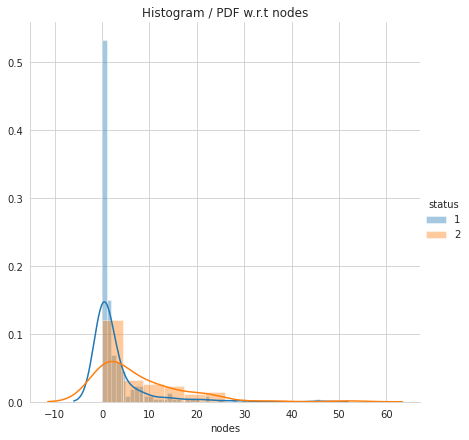

In [ ]:
#Histogram & PDF plot w.r.t nodes

sns.FacetGrid(hb, hue="status", height=6) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram / PDF w.r.t nodes')
plt.show();

**Observation :**

* Most of the patients who survived had no nodes & some of them had less than 4 nodes.

* The patient's  who didn't survived had less than 10 nodes.

For all features, the **PDF & Histogram plots** of both class overlap on each other.

Hence, these features are unable to classify the datapoints i.e. predict the **survival status** of patient.


##**Cumulative Disribution Function Plot**

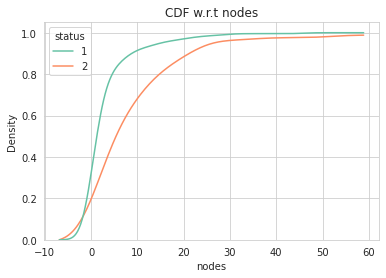

In [ ]:
# Cumulative Distribution Function Plot 
# CDF determines the exact percentage of patient having a certain x-value (Attribute value)

# Cumulative Distribution Function Plot of nodes 

sns.kdeplot(
    data=hb, x="nodes", hue="status",palette = "Set2",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('CDF w.r.t nodes')
plt.show();

**Observations :** 

* Almost 90% of the patients who survived had less than 10 nodes.
* Almost 80% of the patients who survived had less than 4 nodes.
* Almost 90% of patients who didn't survived, had less than 20 nodes.
* Almost 70% of patients who didn't survived had less than 10 nodes.

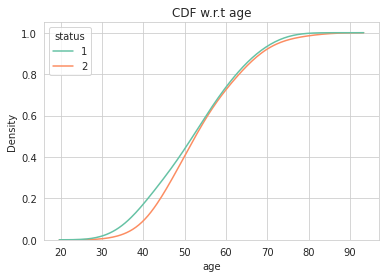

In [ ]:
# Cumulative Distribution Function Plot of age

sns.kdeplot(
    data=hb, x="age", hue="status",palette = "Set2",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('CDF w.r.t age')
plt.show();

**Observation :**

* Almost all of the patients (95%) are of age less than 89

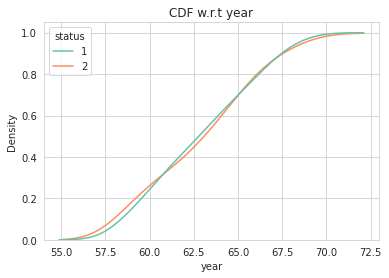

In [ ]:
# Cumulative Distribution Function Plot of year

sns.kdeplot(
    data=hb, x="year", hue="status",palette = "Set2",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('CDF w.r.t year')
plt.show();

**Observation :**

* Even CDF didn't prove much useful in classification of patients ,since the plots are overlapping on each other.

* But we got a fair idea about the distribution of datapoints in the dataset via Histograms, PDF &  CDF.

* Also, we understood that "Year" is the least important feature for classification.

#**Mean, Variance, Std. Deviation :**

In [ ]:
#Mean, Variance, Std. Deviation 

print("---------------- Age --------------------------")

print("Mean : ", hb["age"].mean())
print("Variance : ", np.var(hb["age"]))
print("Std. deviation : ", np.std(hb["age"]))

print("------------------Nodes--------------------------")

print("Mean : ", hb["nodes"].mean())
print("Variance : ", np.var(hb["nodes"]))
print("Std. deviation : ", np.std(hb["nodes"]))

# We didn't computed mean,std deviation for "Year" feature because "Year" is a date hence it wouldn't have made much sense 

---------------- Age --------------------------
Mean :  52.45751633986928
Variance :  116.33316245888332
Std. deviation :  10.78578520363183
------------------Nodes--------------------------
Mean :  4.026143790849673
Variance :  51.52219231919361
Std. deviation :  7.177896092811152


**Observation :** 

* Mean, Variance & Std Deviation helps us to visualize PDF & Histograms in our head.
* Average age of Patients is 52(approx).
* Average number of nodes for a patient is 4 (approx.).

##**Now, let's divide the whole data on the basis of their survival status and then get insights on it for better understanding**

**-- Mean, Std. Deviation, Percentile, Inter-Quantile Range**

In [ ]:
hb_1 = hb.loc[hb["status"] == 1]
hb_2 = hb.loc[hb["status"] == 2]

# For the patients who survived for more than 5 years

print(" Survival status : 1 (Survived for more than 5 years)")
hb_1.describe()

 Survival status : 1 (Survived for more than 5 years)


,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [ ]:
# For the patients who didn't survived for 5 years

print("Survival Status : 2 (Didn't survived for 5 years)")
hb_2.describe()

Survival Status : 2 (Didn't survived for 5 years)


,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


#**Box Plots and Violin Plots :**

**Box Plots with Whiskers**

No handles with labels found to put in legend.


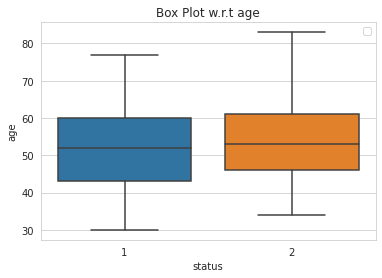

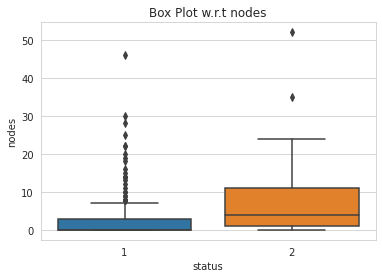

In [ ]:
# Box Plots with whiskers helps visualize Percentile, Quantile ,IQR and Range
#Whiskers 

#Box-Plot for age
sns.boxplot(x='status',y='age', data=hb)
plt.legend()
plt.title('Box Plot w.r.t age')
plt.show()

#Box-Plot for nodes
sns.boxplot(x='status',y='nodes', data=hb)
plt.title('Box Plot w.r.t nodes')
plt.show()

**Note :**

**IQR :** Most of the datapoints lies under this range.
        
        * IQR = 25th percentile value to 75th percentile value

**In case of Nodes ,**

**IQR for Survival Status: 1** --> 0 to 4  

**IQR for Survival Status: 2** --> 2 to 12

**In case of Age of Patient,**

**IQR for Survival Status: 1** --> 43 to 60

**IQR for Survival Status: 1** --> 46 to 61

## **Violin PLots**

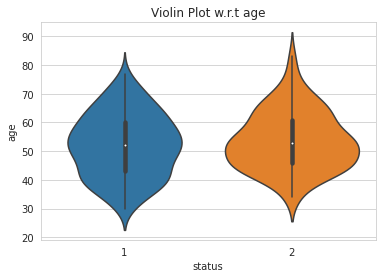

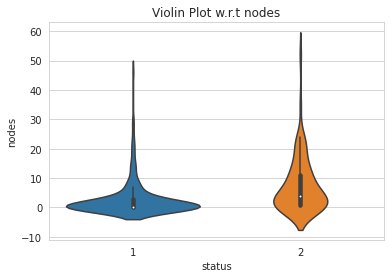

In [ ]:
#Violin PLots combines the advantages of both the PDF as well as Box-Plots.

#Violin Plots for Age

sns.violinplot(x="status", y="age", data=hb, size=8)
plt.title('Violin Plot w.r.t age')
plt.show()

#Violin PLots for Nodes

sns.violinplot(x="status", y="nodes", data=hb, size=8)
plt.title('Violin Plot w.r.t nodes')
plt.show()

**Observation :**

* Most of the patients who survived for more than 5 years had less than 4 nodes .i.e.  **No. of nodes <= 4**.

* Most of the patients who didn't survived for 5 years had less than 12 nodes .i.e. **No. of nodes <= 12**

* Most of the patients lies in the age group of 40 to 60 irrespective of their survival status.

**Conclusion (Univariate Analysis) :**

* We observed that any individual features are not enough capable to classify/predict the survival status of patients.

* All the patients belonged under the same age group, irrespective of whether they survive or not.

 Although it's not much useful in prediction, we can still conclude that people under the age group of 40 to 60 are most likely to suffer from breast cancer.

* However, if we still need to choose, **Nodes** is the best possible option (feature) we have for classification.


* **Year** is the least capable feature, hence avoid using it for EDA.



## **Bivariate Analysis**

-- Check if combination of features helps us in classification of survival status of patients


**1.  Pair-wise Scatter Plot**

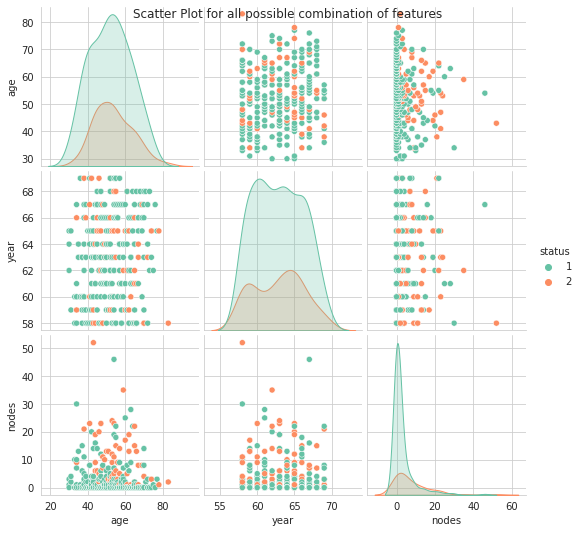

In [ ]:
# Pair Plot with color coding
# to determine if the combination of features are significant for classification 

s1 = sns.pairplot(hb,hue = "status", palette = "Set2")
s1.fig.suptitle("Scatter Plot for all possible combination of features")
plt.show()

**Observation :** 
All the scatter plots have much overlapping, which makes it difficult for classification.

Out of all these scatter-plots, the age-nodes scatter plot has the least overlapping , hence it is better than the others when it comes to the classification purpose.

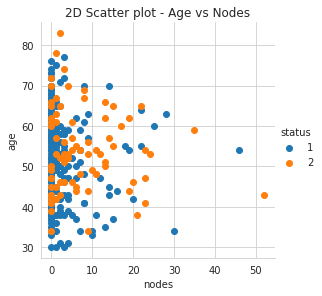

In [ ]:
# 2-D Scatter Plot of Age - Nodes


sns.FacetGrid(hb, hue="status", height=4) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.title('2D Scatter plot - Age vs Nodes')
plt.show();

**Conclusion : (Bivariate Analysis)**

As we can see, none of the combination of features are capable enough for successful classification of Survival Status of patients.

All the data-points are overlapping on each other.

Still if we need to choose one, **Age-Nodes** Scatter Plot is the most suitable for classification purpose, out of them all.

#**Multi - variate Analysis :**

--Contour Plot

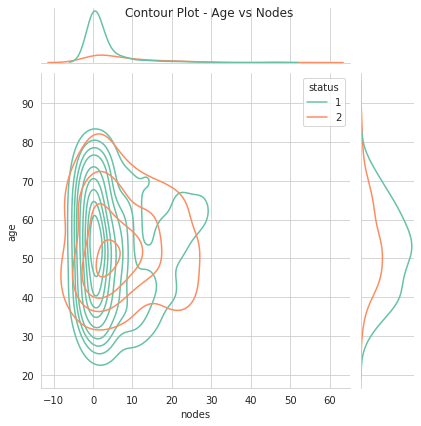

In [ ]:
#2D Density plot, contors-plot
s = sns.jointplot(x="nodes", y="age", data=hb, kind="kde", hue = "status")
s.fig.suptitle("Contour Plot - Age vs Nodes")
plt.show();


**Observation:**

Contour Plot gave us a little more detailed look at the distribution and we observed that even the **Age-Nodes** (combination of features) isn't suitable enough for the classification of datapoints.

**Final Conclusion :**

1. We can't depend on any of these 4 features completely for classification of patients on their survival status i.e predict the survival status of patients.

2. The year of operation seems to have no impact at all on the survival status of the patient.

3. We observed that the people under the age group of **40 to 60** are most likely to suffer from breast cancer. But, still the "age" feature wasn't of much help in predicting their survival status.

4. However, the " **No. of Nodes** " feature proved to be useful to some extent.

    * We observed that the patients with less than **4 nodes** are most likely to   survive for 5 years and more.

    * With Maximum surviving patients having **0 nodes**.

    Hence, we can conclude that **lesser the nodes, more the chance of survival**.
    
    * Most patients are found to have less than **10 nodes**, irrespective of their survival status, hence we can say that having 10 nodes and more is pretty rare.